% Some modifications to table style
<style>
table.mytable {
  //border: 1px solid black;
  border-collapse: collapse;
  border-color: grey;
}
table.mytable td {
  padding: 2px;
  text-align: left;
  height: 5px;
  line-height: 1;
  vertical-align: bottom;
  border-top: 0px;
}

table.mytable th {
  padding: 2px;
  text-align: left;
  height: 5px;
  line-height: 1;
  vertical-align: bottom;
}
</style>

Block diagram of AI
==========


## Knowledge representation

- Logical rules: A database of logical relationships of concepts.
- Semantic network: A graph consisting of concepts as nodes and their relations as vertices. The semantic network can also represent the data in logical database, but has greater expressiveness.
- Frame representation: A frame is a record containing many attributes related to the real world objects. It would be an object in the object oriented language. The connections between frames can create a graph like structures.

The Greek philosopher Aristotle defined a framework of rational thinking by defining logical syllogisms, the patterns for arguments which always produces correct conclusions, provided that the premises are correct. Much later, it was proposed that an artificial machine could use these kinds of logical rules and the database of premises to draw conclusions. The premises and the rules creates a logical database and a program can use it to make queries to find out if some statements are true or false. Many AI systems are made using this approach. Practical problems are that it is a lot of work to encode the complete set of premises and logical rules of a practical case into the database, and solving complex queries may need too much computational resources to be efficient. In addition the traditional logic does not support the concept of uncertainty.


### Logics database

- Inference engine
- Resolution
- Backward chaining
- Forward chaining
- Belief network

## Classical AI:

Expert systems were supposed to be able to make decisions on behalf of a person. They consisted of a large number of logical rules stored in the knowledge database, which was used to resolve true statements based on the facts perceived and the rules stored. They are still used in certain applications, like in a bird recognition system [Luontoportti](www.luontoportti.fi).

The bird species can be recognized by searching true statements from the database of logical rules. Each observation rules out part of the possible species.


    If (color is white)                 (A)
        and (wings are dark)            (B)
        and (size equals to crow)       (C)
        and (circulates in the air)     (D)
        and (swims in water)            (E)
    then it is a seagull                (Q)

The database above is based on logical syllogisms, defined by Aristoteles. It can be also described with more mathematical notation as follows:

$$
    A \wedge B \wedge C \wedge D \wedge E \rightarrow Q
$$

The knowledge database or knowledge base (KB) of [Luontoportti](www.luontoportti.fi) is build in the opposite direction though using simple logical rules as follows:

$$
\begin{eqnarray}
    \mathrm{KB} = ( Q &\rightarrow& A, \\
        Q &\rightarrow& B, \\
        Q &\rightarrow& C, \\
        Q &\rightarrow& D, \\
        Q &\rightarrow& E )
\end{eqnarray}
$$

The inference shown above can be made from the KB using propositional logics, for example a method called [resolution](https://en.wikipedia.org/wiki/Resolution_(logic)). Using resolution, the validity of a sentence under a set of axioms can be proven. This means that the by logical inference, the system can proof if the observations match to the hypothesis, that the bird was seagull or not.

The knowledge database above can be used in both directions.

- If we know the species, we can find out the properties, for examples it can be seen that seagulls are white. This kind of inference is called as *forward chaining*, or *prediction*, because it predicts the properties or perceptions based on the species. Example in the medical field would be to describe the symptoms when the diagnosis is known.
- If we on the other hand know the perceptions, we can use the database to find out the species where the observations fit. This kind of inference is called as *backward chaining* or *diagnostics'. In medical field this is used for diagnosing the cause, the disease, when the symptoms are known.

The inference using logics KB is carried out by searching. Exhaustive search by trying all possible solutions is the simplest method, but it uses plenty of resources and is unfeasible in most practical databases.

### Propability

Medical diagnosis, current care guidelines (käypähoitosuositukset)

The symptoms for having a stroke or TIA
- One sided face paralysis
- difficulties to speak (afasia)
- one eye vision problems
- nausea
- double images in vision
- difficulties to swallow

Each symptom increases the propability of the diagnosis. A different probability may be involved in each symptom and connection with a stroke

Some symptoms are very common in many conditions, like nausea. Therefore their specificity is low, and their power for predicting stroke is therefore low.

One sided face paralysis is on the other hand rare in other conditions, and therefore its specificity is high, and it is a good symptom for diagnosing stroke. If one does not have this symptom, it may be reduce the hypothesis that the stroke is the cause for other symptoms.

Properties
- Human knowledge is expressed as rules

Cons
- gathering the rules is awkward, difficult for real world cases and impossible for complex cases
- combinatorial explosion follows

### Graphs

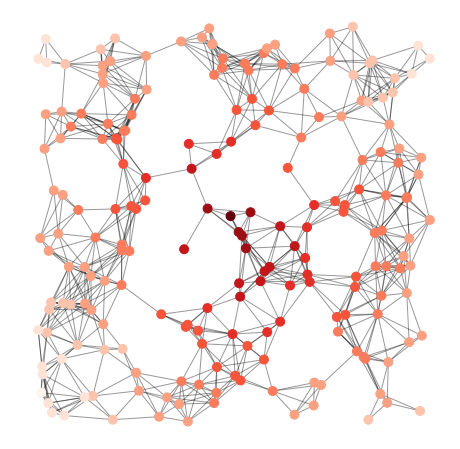

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

A graph is simply a structure which has nodes (also called as vertices) which are connected to each other with edges (lines). The edges can be unidirectional (arrows) or bi-directional (lines). A graph with unidirectional edges is called as directed graph, whereas a graph containing only bi-directional edges is called undirected graph. If the graph contains cycles (or loops), it is said to be a cyclic graph. If it has no cycles, the graph is acyclic graph. If the graph contains a path between each nodes, the graph is said to be connected, otherwise it contains isolated sections and it is called disconnected.
Acyclic connected graph is called as tree and acyclic disconnected graph as forest.

Examples of different graphs are shown in Figures {numref}`fig:nondiag_graph` - {numref}`fig:treegraph`.

Mathematically, a graph $G$ is expressed as a set of Edges $E$ and vertices $V$:

$$
  G=(V,E)
$$ (eq:graph)

```{figure} figures/graafi_nondirectional.svg
---
width: 600px
align: center
name: fig:nondiag_graph
---

An example of cyclic undirected graph.
```


```{figure} figures/graafi_cyclic.svg
---
width: 300px
align: center
name: fig:cyclicraph
---

An example of a directed cyclic graph.
```


```{figure} figures/graafi_DAG.svg
---
width: 300px
align: center
name: fig:treegraph
---

An example of a directed a-cyclic graph (DAG), a directed tree.
```

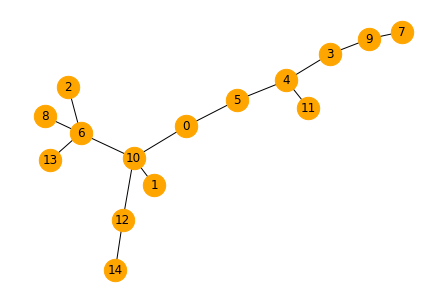

In [2]:
rg=nx.random_tree(15)
nx.draw(rg, with_labels=True, font_weight='normal', node_color='orange', node_size=500)

### Knowledge database as a graph

```{figure} figures/holmes.svg
---
width: 300px
align: center
name: fig:holmes
---

Holmes problem: Infer the probability of hypothesis H (burglary) in case of unreliable evidence G and W, through an evidence S.
```

Example: Mr Holmes receives a phonecall from Dr Watson who claimes that heard the burglar alarm from Mr Holmes home. Holmes knows that Mr Watson can be making practical jokes sometimes, so he will first call to his another neighbour Mrs Gibbon, to ask if she has also heard the alarm. Mrs Gibbon has however a small hearing problem and bad memory, so this evidence is not perfectly reliable as well. What is the probability that there is actually a burglary in Mr Holmes home?

Represeting the data of unreliable evidence as a graph is rather natural for humans, according to Pearl.
The uncertainties can be expressed as probabilities, and inference can be made using probabilistic reasoning with the help of Bayes rule. One form of this probabilistic reasoning are the Bayesian Networks.

The probability of the burglary alarm to observe the burglary, and play the sound is given by conditional probability:

$$
  P(S | B) = \frac{P(S,B)}{P(B)},
$$

where $P(S,B)$ is the probability of both burglary and alarm sound to happen at the same time, and the p(B) is the probability of the burglary in general, so called *a-priori* or prior probability. 

The probability of the burglary (B) in case of alarm sound (S) can be given respectively

$$
  P(B | S) = \frac{P(B,S)}{P(S)},
$$
where $P(B,S) = P(S,B)$ and $P(S)$ is the probability of the alarm sound to happen in general. 
The famous Bayes inversion rule can be used as follows:

$$
  P(B | S) = \frac{P(S|B) P(B)}{P(S)}
$$

This formula is particularly interesting, since it provides a method for updating the probability of the hypothesis (Burglary, B) when finding out new evidence (Alarm sound, S).

It may be interesting to compare the probability of the hypothesis to the probability of the complement, the probability of that event not happening. Mathematically it would mean:

$$
   \frac{P(H|e)}{P(\neg H|e)} = \frac{P(e|H}{P(e | \neg H)} \frac{P(H)}{P(\neg H)}
$$

Defining prior odds as:

$$
   O(H) = \frac{P(H)}{P(\neg H)} = \frac{P(H)}{1-P(H)}
$$

and likelihood ratio

$$
   L(e|H) = \frac{P(e|H)}{P(e|\neg H)}
$$

the posterior odds

$$
   O(H|e) = \frac{P(H|e)}{P(\neg H | e)} = L(e|H) O(H)
$$

Thus the strength of belief in hypothesis H, based on the previous knoledge and new evidence e, is given by the product of the likelihood ratio $L(e|H)$ and prior odds $O(H)$. The prior odd $O(H)$ provides predictive support by the previous knowledge alone and the likelihood ratio $L(e|H)$ provides diagnostive support, based on new evidence observed.

By using this formula, it is possible to chain the calculation of hypotheses to make the final conclusion. The solution for the Bayesian network as a whole is still rather comples, but there are algorithms which can solve it in polynomial time. 



#### Graph Search methods

When planning actions using a graph, a graph search algorithm is often used.

- Breadth First
- Depth First
- Heuristic function
- Greedy algorithms
- Hill climbing
- Optimisation

## Learning

- On-line learning
- Machine learning
- Deep learning


- Markov model
- Neural network
- Deep learning


## The block diagram of AI concepts

```{figure} figures/BlockDiag.svg
---
width: 800px
align: center
name: fig:blockdiag_graph
---

The block diagram, or visual table of contents of AI. The blue underlined labels are links to the corresponding course material.
```


## Read more

> Programming is a superpower

<ul>
<li> Harrison: <a href="https://pythonprogramming.net">Python programming</a>
<li> <a href="https://www.tutorialspoint.com/artificial_intelligence_with_python/index.htm">AI with Python Tutorial</a>
<li> Daniele Paliotta: <a href="https://stackabuse.com/introduction-to-reinforcement-learning-with-python/">Introduction to Reinforcement Learning with Python</a>
<li> Harrison: <a href="https://pythonprogramming.net/q-learning-reinforcement-learning-python-tutorial/">Q-Learning introduction and Q Table - Reinforcement Learning w/ Python Tutorial p.1</a>
<li> Harrison: <a href="https://pythonprogramming.net/introduction-self-driving-autonomous-cars-carla-python/">Introduction - Self-driving cars with Carla and Python part 1</a>
</ul>